# Vehicle Loan Prediction Machine Learning Model

# Chapter 2- Load and Clean the Data


First, we will import the required libraries and load the data!

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading the Data

- Our vehicle loan data is provided in csv format 
- We can load it into python as a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- Each loan in our dataset has a UNIQUEID which we will use as the row index

First, let's use pandas to load our loan data and store it in a variable called loan_df

- Replace ‘../data/vehicle_loans.csv’ with your local file path and name

In [2]:
#Load data
loan_df = pd.read_csv('../data/vehicle_loans.csv', index_col='UNIQUEID')

We can use [df.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) to get the first n rows from a DataFrame

- defaults to bring out the first 5 rows

In [3]:
#get loan_df head
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## First Look

Now that we have loaded the data, let's take a closer Look

### Rows and Columns

- How many data points do we have?
- How many attributes are there?
- We can get the dimensions of our DataFrame using [df.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

In [4]:
#Investigate shape
loan_df.shape

(233154, 40)

- The shape property of a dataframe contains a tuple with the dimensions of the dataframe

In [5]:
#print rows and cols
print("Number of rows: ", loan_df.shape[0])
print("Number of columns: ", loan_df.shape[1])

Number of rows:  233154
Number of columns:  40


Ok, so we have 233154 data points each with 40 variables


### Variable Types

- Before we go any further it is important to understand the type of data stored in our columns
- Pandas [df.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) shows us both the data type and the not null count for each column


In [6]:
#Look at column types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

Now we know we have 3 data types:
- int64 (whole number)
- float64 (floating point number)
- object (string or non-numeric)

Straight away there are some interesting things,

DATE_OF_BIRTH, EMPLOYMENT_TYPE, DISBURSAL_DATE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH are all object data types, meaning they contain non-numeric values such as strings or dates. 

EMPLOYMENT_TYPE has some missing values


### Date Range

DISBURSAL_DATE contains the date the agreed loan amount was transferred to the applicant, let's use it to get an idea of the timeframe covered by the data 

The first step is to convert DISBURSAL_DATE to a datetime
- We can use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert an entire column to datetime 



In [8]:
#covert disbursal date
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

Now we can use [min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html) and [max] to look for the first and last loan disbursals in our data

In [9]:
#get minimum and maximum date
print("Maximum Disbursal Date: ", loan_df['DISBURSAL_DATE'].max())
print("Minium Disbursal Date: ", loan_df['DISBURSAL_DATE'].min())

Maximum Disbursal Date:  2018-12-10 00:00:00
Minium Disbursal Date:  2018-01-08 00:00:00


We can do mathematical operations on datetimes to get the difference in days

In [10]:
#print timespan
print("Timespan of Data Set: ", loan_df['DISBURSAL_DATE'].max() - loan_df['DISBURSAL_DATE'].min())

Timespan of Data Set:  336 days 00:00:00


### Now we know

- Our dataset has information for 233154 loans 
- There are 40 variables 
- The data covers loans over 336 days between January and December 2018

More detailed exploratory analysis will be covered in the next chapter

For now, let's move on to look at what we are actually trying to predict

## Lesson 3 - Target Variable

### What is the target variable?

- Variable we are trying to predict
- LOAN_DEFAULT is our target variable so lets investigate it further


### Explore the Target Variable
- How many people defaulted on their loans?
- To count the frequency of unique values in a dataframe column we can use [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [11]:
#look at LOAN_DEFAULT
loan_df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

Great! We can see that out of our 233154 loans, there are 50611 which defaulted

The 'normalize' parameter lets us use value_counts to get a percentage

In [12]:
#look at LOAN_DEFAULT normalized
loan_df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

### Visualize the Target Variable

Just for good measure lets visualize our target variable using the [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function from seaborn

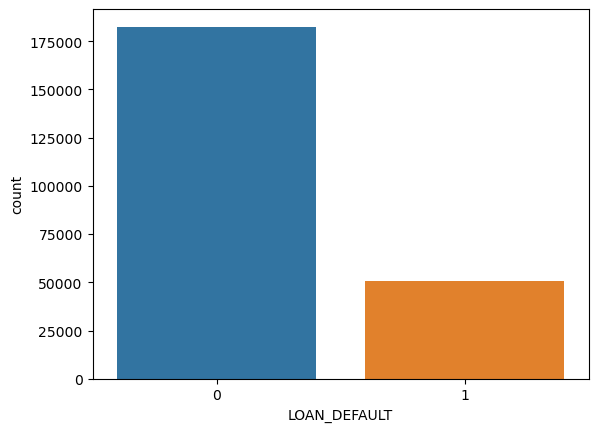

In [13]:
#plot loan default
sns.countplot(x="LOAN_DEFAULT", data=loan_df)
plt.show()

## Missing Values

We saw earlier that our dataset contains some missing values, specifically for the EMPLOYMENT_TYPE column.

### Identifying Missing Data

Time to investigate what we saw earlier by identifying the columns with missing values

Using [df.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) we can find those columns which have at least one null value


In [14]:
#get cells with missing values
loan_df.isnull()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537409,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
417566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
624493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
606141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
613658,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
#get columns with missing values
loan_df.isnull().any()

DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                    False
BRANCH_ID                              False
SUPPLIER_ID                            False
MANUFACTURER_ID                        False
CURRENT_PINCODE_ID                     False
DATE_OF_BIRTH                          False
EMPLOYMENT_TYPE                         True
DISBURSAL_DATE                         False
STATE_ID                               False
EMPLOYEE_CODE_ID                       False
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                            False
PAN_FLAG                               False
VOTERID_FLAG                           False
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                      False
PERFORM_CNS_SCORE_DESCRIPTION          False
PRI_NO_OF_ACCTS                        False
PRI_ACTIVE_ACCTS                       False
PRI_OVERDU

As expected, the only column with any null values is EMPLOYMENT_TYPE

Combine [df.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) with [df.sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) to get a count of missing values for all columns

In [16]:
#get missing value count per column
loan_df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

### Handling Missing Values

Ok, we can see that EMPLOYMENT_TYPE has 7661 missing values so we should take a closer look,

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64


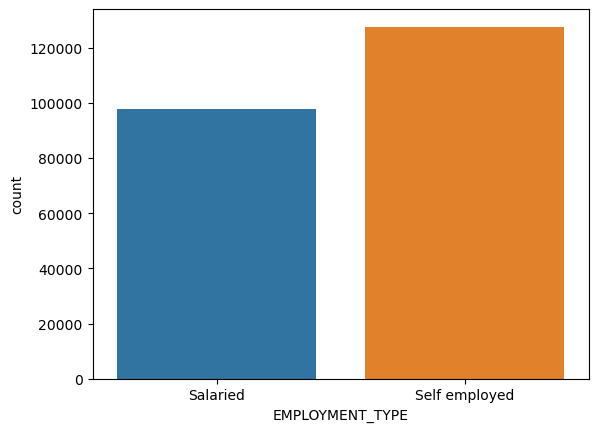

In [17]:
print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

Note that EMPLOYMENT_TYPE contains two unique values, 'Salaried' and 'Self Employed'

Since there are relatively few missing values (7661) we can populate them with a placeholder 'Missing' using pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [18]:
#Fill missing values
loan_df = loan_df.fillna(value={'EMPLOYMENT_TYPE' : 'Missing'})

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64


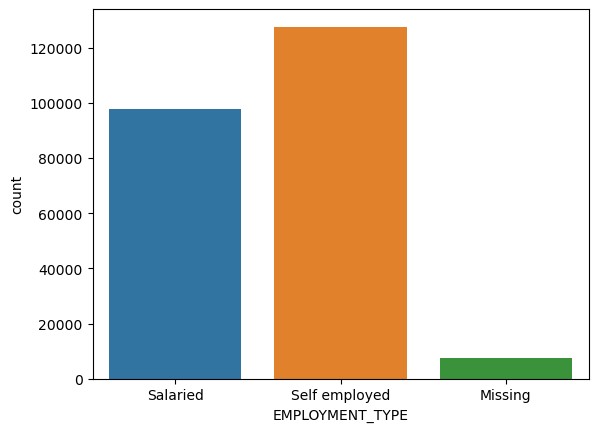

In [19]:
#Plot employment type
print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

We can see that the 7661 missing values for employment type have been labelled with the string 'Missing'

## Dealing with Dates

- We have two date columns, DISBURSAL_DATE and DATE_OF_BIRTH
- These should be transformed into a more algorithm friendly format

In [20]:
#Print DISBURSAL_DATE and DATE_OF_BIRTH
loan_df[['DISBURSAL_DATE', 'DATE_OF_BIRTH']].sample(10)

,DISBURSAL_DATE,DATE_OF_BIRTH
UNIQUEID,,
646501,2018-10-31,01-01-1990
634660,2018-10-28,01-01-1992
556604,2018-04-10,16-05-1988
506321,2018-09-14,11-07-1994
471692,2018-08-29,08-09-1994
491430,2018-05-09,22-08-1988
493265,2018-06-09,16-12-1996
612136,2018-10-24,28-03-1994
564551,2018-09-10,01-01-1975


### Calculating Age 

- Intuitively it is fair to assume that age is associated with loan default risk 
- However, we currently do not have a measure of age, only date of birth


In [22]:
#type solution here
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

#calculate their age at time of disbursal
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH']
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')

#Inspect the results
print(loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))

         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
558239      1985-07-19   32     2018-05-10
554229      1966-02-02   52     2018-09-30
495681      1966-04-01   52     2018-07-09
592550      1995-08-14   23     2018-10-20
639140      1987-10-09   31     2018-10-29


In [23]:
#step 1
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

print("DATE_OF_BIRTH variable type: ", loan_df['DATE_OF_BIRTH'].dtypes)
print("DISBURSAL_DATE variable type: ", loan_df['DISBURSAL_DATE'].dtypes)

DATE_OF_BIRTH variable type:  datetime64[ns]
DISBURSAL_DATE variable type:  datetime64[ns]


- now calculate the difference between DISBURSAL_DATE and DATE_OF_BIRTH

In [24]:
#step 2
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH']
loan_df['AGE'].sample(n=10)

UNIQUEID
544689   14880 days
576625    9638 days
439149    9033 days
420251   14710 days
549400    7956 days
566833   15144 days
634152   14910 days
566436   13432 days
584036   11141 days
579724   13071 days
Name: AGE, dtype: timedelta64[ns]

- now we have the age in days 
- divide age by 1 year
- // operator performs division and rounds down to the nearest whole number

In [25]:
#step 3
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')

- sanity check our output

In [26]:
#step 4
print(loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))

         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
567367      1985-01-01   33     2018-10-10
636860      1990-05-06   28     2018-10-29
441755      1964-06-06   54     2018-08-16
502399      1980-05-12   38     2018-12-09
490372      1985-01-03   33     2018-05-09


In [27]:
#Type solution here
loan_df['DISBURSAL_MONTH'] = loan_df['DISBURSAL_DATE'].dt.month
loan_df['DISBURSAL_MONTH'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64

As we can see, the distribution of loan disbursals is not even across all months, we will look into this in future lessons but for now, we can drop the disbursal date column.

We can now [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) DISBURSAL_DATE and DATE_OF_BIRTH from our data 

In [28]:
#drop columns
loan_df = loan_df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1)

## Fix the Strings

- AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH were also strings 
- Column names suggest they should be numeric, let's take a look 

In [29]:
# sample 'CREDIT_HISTORY_LENGTH' and 'AVERAGE_ACCT_AGE'
loan_df[['CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']].sample(n=10)

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
UNIQUEID,,
635065,0yrs 0mon,0yrs 0mon
648891,1yrs 3mon,1yrs 3mon
648152,1yrs 11mon,0yrs 11mon
569510,2yrs 5mon,1yrs 1mon
471865,0yrs 3mon,0yrs 1mon
461114,0yrs 0mon,0yrs 0mon
465594,4yrs 9mon,3yrs 6mon
562517,0yrs 2mon,0yrs 2mon
455123,4yrs 7mon,1yrs 11mon


Both columns contain measures of time in the format "0yrs 0mon"

This string representation is not useful for analysis or prediction so let's convert it into a number

### String Manipulation

The current format of AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH is not useful


### Create a function which can calculate the total number of months based on a list of input strings

The calc_months function simply takes the list of two numbers stored in AVERAGE_ACCT_AGE_MONTHS


In [30]:
# step 1
def calc_months(str_list):  
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

### Step 2 - Extract the relevant numbers from the original string data

Pandas str.findall can be used to find all instances of a string within a column

the '\d+' is a regular expression which finds integers in a string

regular expressions can be used to identify and extract patterns in strings
all you need to know for know is that loan_df'AVERAGE_ACCT_AGE'.str.findall('\d+') returns a list of all the numbers in the string stored in the 'AVERAGE_ACCT_AGE' column

In [31]:
#step 2
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.findall('\d+')
print(loan_df['AVERAGE_ACCT_AGE_MONTHS'].sample(n=10))

UNIQUEID
611618     [0, 6]
601052     [0, 0]
533130     [0, 0]
614180     [0, 0]
513968     [0, 8]
486147     [0, 0]
653677    [5, 11]
526899     [1, 2]
464187     [7, 9]
542065     [0, 0]
Name: AVERAGE_ACCT_AGE_MONTHS, dtype: object


This creates a column 'AVERAGE_ACCT_AGE_MONTHS' which stores a list of numbers where the first item represents the number of years and the second represents the number of months

### Step 3 - Use map to perform calc_months across all rows

Use [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) to apply a function which calculates the total number of months for each row in the dataframe

In [32]:
#step 3
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE_MONTHS'].map(calc_months)

### Step 4 - Inspect the results

In [33]:
#step 4
print(loan_df[['AVERAGE_ACCT_AGE_MONTHS', 'AVERAGE_ACCT_AGE']].sample(n=10))

          AVERAGE_ACCT_AGE_MONTHS AVERAGE_ACCT_AGE
UNIQUEID                                          
419657                         24        2yrs 0mon
451060                          0        0yrs 0mon
535711                          0        0yrs 0mon
590129                          0        0yrs 0mon
523041                         12        1yrs 0mon
498645                         25        2yrs 1mon
642064                          0        0yrs 0mon
441293                         11       0yrs 11mon
622568                         11       0yrs 11mon
417700                         18        1yrs 6mon


In [34]:
def convert_str_to_months(col_name):
    new_col = col_name + '_MONTHS'
    loan_df[new_col] = loan_df[col_name].str.findall('\d+')
    loan_df[new_col] = loan_df[new_col].map(calc_months)

Run the function and check the output

In [35]:
convert_str_to_months('CREDIT_HISTORY_LENGTH')
loan_df[['CREDIT_HISTORY_LENGTH_MONTHS', 'CREDIT_HISTORY_LENGTH']].sample(n=5)

,CREDIT_HISTORY_LENGTH_MONTHS,CREDIT_HISTORY_LENGTH
UNIQUEID,,
518526,0,0yrs 0mon
634573,29,2yrs 5mon
489807,0,0yrs 0mon
424073,4,0yrs 4mon
462865,12,1yrs 0mon


In [36]:
#drop 'CREDIT_HISTORY_LENGTH' and 'AVERAGE_ACCT_AGE'y
loan_df = loan_df.drop(['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'], axis=1)

I have now cleaned all of the ‘object’ columns except ‘PERFORM_CNS_SCORE_DESCRIPTION’
- Use [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to have a quick look at this 

In [37]:
#use value_counts to investigate PERFORM_CNS_SCORE_DESCRIPTION
loan_df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [38]:
#save cleaned data
loan_df.to_csv('../data/vehicle_loans_clean.csv')